# DATA MINING - WEEK 1
## NGUYEN XUAN VIET DUC
## 22280012 

### I. Objectives:
- After this lesson, students must satisfy the following:
    - Data cleaning and data preprocessing
    - Fluently in practicing Pandas and Scikit-learn
    - Normalization
    - Discretization of data
    - PCA

## I. Practice content
### 1. Data cleaning and preprocessing

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("C:\\Users\\kkagi\\Downloads\\data.csv", delimiter = ";")
df = df.set_index("ID")
print(df)

   First Name Last Name    Age Gender Department   Salary Date of Joining
ID                                                                       
1        John        Doe  25.0      M      Sales  50000.0      01/01/2020
2        Jane      Smith  30.0      F  Marketing  60000.0      06/01/2018
3         Bod    Johnson  45.0      M         HR  70000.0      09/01/2016
4       Alice   Williams  33.0      F         IT  80000.0      02/01/2017
5       James      Brown  27.0      M      Sales  55000.0      03/01/2019
6       Sarah        Lee   NaN      F  Marketing  65000.0      12/01/2018
7     Michael      Davis  39.0      M         HR      NaN      08/01/2015
8       Susan     Miller  42.0      F         IT  90000.0      11/01/2014
9       David     Wilson  28.0      M      Sales  60000.0      05/01/2020
10      Emily      Brown  35.0      F  Marketing  55000.0      04/01/2017
11       John        Doe  25.0      M      Sales  50000.0      01/01/2020
12       John        Doe  25.0      M 

In [5]:
print(df.isnull().sum())

First Name         0
Last Name          0
Age                1
Gender             0
Department         0
Salary             1
Date of Joining    0
dtype: int64


In [6]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace = True)
df

,First Name,Last Name,Age,Gender,Department,Salary,Date of Joining
ID,,,,,,,
1,John,Doe,25.000000,M,Sales,50000.000000,01/01/2020
2,Jane,Smith,30.000000,F,Marketing,60000.000000,06/01/2018
3,Bod,Johnson,45.000000,M,HR,70000.000000,09/01/2016
4,Alice,Williams,33.000000,F,IT,80000.000000,02/01/2017
5,James,Brown,27.000000,M,Sales,55000.000000,03/01/2019
6,Sarah,Lee,32.181818,F,Marketing,65000.000000,12/01/2018
7,Michael,Davis,39.000000,M,HR,62272.727273,08/01/2015
8,Susan,Miller,42.000000,F,IT,90000.000000,11/01/2014
9,David,Wilson,28.000000,M,Sales,60000.000000,05/01/2020


In [7]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df)

2
   First Name Last Name         Age Gender Department        Salary  \
ID                                                                    
1        John        Doe  25.000000      M      Sales  50000.000000   
2        Jane      Smith  30.000000      F  Marketing  60000.000000   
3         Bod    Johnson  45.000000      M         HR  70000.000000   
4       Alice   Williams  33.000000      F         IT  80000.000000   
5       James      Brown  27.000000      M      Sales  55000.000000   
6       Sarah        Lee  32.181818      F  Marketing  65000.000000   
7     Michael      Davis  39.000000      M         HR  62272.727273   
8       Susan     Miller  42.000000      F         IT  90000.000000   
9       David     Wilson  28.000000      M      Sales  60000.000000   
10      Emily      Brown  35.000000      F  Marketing  55000.000000   

   Date of Joining  
ID                  
1       01/01/2020  
2       06/01/2018  
3       09/01/2016  
4       02/01/2017  
5       03/01/2019 

In [8]:
df = pd.get_dummies(df, columns=['Gender', 'Department'])
df

,First Name,Last Name,Age,Salary,Date of Joining,Gender_F,Gender_M,Department_HR,Department_IT,Department_Marketing,Department_Sales
ID,,,,,,,,,,,
1,John,Doe,25.000000,50000.000000,01/01/2020,False,True,False,False,False,True
2,Jane,Smith,30.000000,60000.000000,06/01/2018,True,False,False,False,True,False
3,Bod,Johnson,45.000000,70000.000000,09/01/2016,False,True,True,False,False,False
4,Alice,Williams,33.000000,80000.000000,02/01/2017,True,False,False,True,False,False
5,James,Brown,27.000000,55000.000000,03/01/2019,False,True,False,False,False,True
6,Sarah,Lee,32.181818,65000.000000,12/01/2018,True,False,False,False,True,False
7,Michael,Davis,39.000000,62272.727273,08/01/2015,False,True,True,False,False,False
8,Susan,Miller,42.000000,90000.000000,11/01/2014,True,False,False,True,False,False
9,David,Wilson,28.000000,60000.000000,05/01/2020,False,True,False,False,False,True


In [9]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Month'] = df['Date of Joining'].dt.month
df['day_of_week'] = df['Date of Joining'].dt.day_name()
df = df.drop('Date of Joining', axis=1)
print(df)

   First Name Last Name         Age        Salary  Gender_F  Gender_M  \
ID                                                                      
1        John        Doe  25.000000  50000.000000     False      True   
2        Jane      Smith  30.000000  60000.000000      True     False   
3         Bod    Johnson  45.000000  70000.000000     False      True   
4       Alice   Williams  33.000000  80000.000000      True     False   
5       James      Brown  27.000000  55000.000000     False      True   
6       Sarah        Lee  32.181818  65000.000000      True     False   
7     Michael      Davis  39.000000  62272.727273     False      True   
8       Susan     Miller  42.000000  90000.000000      True     False   
9       David     Wilson  28.000000  60000.000000     False      True   
10      Emily      Brown  35.000000  55000.000000      True     False   

    Department_HR  Department_IT  Department_Marketing  Department_Sales  \
ID                                             

In [10]:
df1 = df.drop(['First Name', 'Last Name ', 'day_of_week'], axis=1)
array = df1.values
print(array)

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(array)
robust_df = pd.DataFrame(robust_df)

scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(array)
standard_df = pd.DataFrame(standard, index = df.index)
print('Chuan hoa du lieu:\n', standard_df)

scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(array)
minmax_df = pd.DataFrame(minmax, index = df.index)
print('Scaling du lieu:\,', minmax_df)

[[25.0 50000.0 False True False False False True 1]
 [30.0 60000.0 True False False False True False 6]
 [45.0 70000.0 False True True False False False 9]
 [33.0 80000.0 True False False True False False 2]
 [27.0 55000.0 False True False False False True 3]
 [32.18181818181818 65000.0 True False False False True False 12]
 [39.0 62272.72727272727 False True True False False False 8]
 [42.0 90000.0 True False False True False False 11]
 [28.0 60000.0 False True False False False True 5]
 [35.0 55000.0 True False False False True False 4]]
Chuan hoa du lieu:
            0         1    2    3    4    5         6         7         8
ID                                                                      
1  -1.369782 -1.264391 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508
2  -0.575077 -0.405854  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853
3   1.809037  0.452683 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740
4  -0.098254  1.311220  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141

In [11]:
df2 = standard_df.copy()
df2['equi-width_column0'] = pd.cut(x = df2[0], bins = 10)

In [12]:
print('Roi rac hoa cot 0 bang 10 equi-width range:\n', df2)

Roi rac hoa cot 0 bang 10 equi-width range:
            0         1    2    3    4    5         6         7         8  \
ID                                                                         
1  -1.369782 -1.264391 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508   
2  -0.575077 -0.405854  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853   
3   1.809037  0.452683 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740   
4  -0.098254  1.311220  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977   
5  -1.051900 -0.835122 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446   
6  -0.228297  0.023415  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333   
7   0.855391 -0.210732 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209   
8   1.332214  2.169757  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802   
9  -0.892959 -0.405854 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384   
10  0.219627 -0.835122  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915   

   equi-width_column0  
ID                

In [13]:
df3 = standard_df.copy()
df3['equi-depth_column0'] = pd.qcut(df3[0], q=10)
print('Roi rac hoa cot 0 bang 10 equi-depth range:\n', df3)

Roi rac hoa cot 0 bang 10 equi-depth range:
            0         1    2    3    4    5         6         7         8  \
ID                                                                         
1  -1.369782 -1.264391 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508   
2  -0.575077 -0.405854  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853   
3   1.809037  0.452683 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740   
4  -0.098254  1.311220  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977   
5  -1.051900 -0.835122 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446   
6  -0.228297  0.023415  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333   
7   0.855391 -0.210732 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209   
8   1.332214  2.169757  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802   
9  -0.892959 -0.405854 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384   
10  0.219627 -0.835122  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915   

   equi-depth_column0  
ID                

## 2. Application exercises

## Cardiac Arrhythmia Dataset Analysis

### Dataset Overview

This dataset contains electrocardiogram (ECG) measurements used to identify and classify different types of cardiac arrhythmias. It includes 452 patient records with 279 different attributes derived from ECG readings and basic patient information.

### Feature Description

The features in this dataset can be grouped into several categories:

#### 1. Demographic Information
- **Age**: Patient's age in years (linear)
- **Sex**: Patient's gender (0 = male; 1 = female) (nominal)
- **Height**: Patient's height in centimeters (linear)
- **Weight**: Patient's weight in kilograms (linear)

#### 2. Global ECG Measurements
- **QRS duration**: Average duration of QRS complex in msec (linear)
- **P-R interval**: Average duration between onset of P and Q waves in msec (linear)
- **Q-T interval**: Average duration between onset of Q and offset of T waves in msec (linear)
- **T interval**: Average duration of T wave in msec (linear)
- **P interval**: Average duration of P wave in msec (linear)
- **Vector angles**: Front plane angles (in degrees) for QRS, T, P, QRST, and J (linear)
- **Heart rate**: Number of heart beats per minute (linear)

#### 3. Channel-Specific ECG Measurements
For each of the 12 standard ECG channels (DI, DII, DIII, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6), the following measurements are recorded:

##### Wave Widths (in msec)
- Q wave, R wave, S wave, R' wave, S' wave widths
- Number of intrinsic deflections

##### Wave Morphology (nominal)
- Existence of ragged R, P, and T waves 
- Existence of diphasic derivation of R, P, and T waves

##### Wave Amplitudes and Areas
- Amplitudes of JJ, Q, R, S, R', S', P, and T waves (in 0.1 millivolt)
- QRSA (Sum of areas of all segments divided by 10)
- QRSTA (QRSA + 0.5 * width of T wave * 0.1 * height of T wave)

### Target Classes

The target variable classifies ECG readings into 16 different categories:

1. **Normal** (245 instances)
2. **Ischemic changes (Coronary Artery Disease)** (44 instances)
3. **Old Anterior Myocardial Infarction** (15 instances)
4. **Old Inferior Myocardial Infarction** (15 instances)
5. **Sinus tachycardy** (13 instances)
6. **Sinus bradycardy** (25 instances)
7. **Ventricular Premature Contraction (PVC)** (3 instances)
8. **Supraventricular Premature Contraction** (2 instances)
9. **Left bundle branch block** (9 instances)
10. **Right bundle branch block** (50 instances)
11. **1. degree AtrioVentricular block** (0 instances)
12. **2. degree AV block** (0 instances)
13. **3. degree AV block** (0 instances)
14. **Left ventricule hypertrophy** (4 instances)
15. **Atrial Fibrillation or Flutter** (5 instances)
16. **Others** (22 instances)

### Data Characteristics

- **Number of Instances**: 452
- **Number of Attributes**: 279
- **Missing Values**: Several, marked with '?'
- **Class Distribution**: Highly imbalanced, with more than half of the instances belonging to the "Normal" class

### Important Notes

1. The dataset aims to distinguish between the presence and absence of cardiac arrhythmia and classify it into one of the 16 groups.
2. The gold standard for classification is cardiologist diagnosis, which this machine learning task aims to replicate.
3. Some classes (11, 12, 13) have zero instances, making this a 13-class classification problem in practice.
4. The extreme class imbalance presents a significant challenge for classification algorithms.

In [16]:
df = pd.read_csv("C:\\Users\\kkagi\\Downloads\\arrhythmia\\arrhythmia.data", delimiter = ",", header = None)
print(df)

     0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275  276   277   278  279  
0    0.0

In [17]:
print(df.isnull().values.any())

False


In [18]:
# Kiểm tra các hàng trùng lặp
duplicated_rows = df[df.duplicated()]

# In ra các hàng trùng lặp
print(duplicated_rows)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 280 columns]


In [19]:
categorical_features = df.select_dtypes(include=['object']).columns

if len(categorical_features) > 0:
  print("Categorical variables found in the dataset:")
  print(categorical_features)
else:
  print("No categorical variables found in the dataset.")

Categorical variables found in the dataset:
Index([10, 11, 12, 13, 14], dtype='int64')


In [20]:
def count_question_marks(df):
    """
    Count the number of '?' values in each string column of the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.

    Returns:
    dict: A dictionary with column names as keys and counts of '?' as values.
    """
    question_mark_counts = {}
    for column in df.columns:
        if df[column].dtype == object:  # Only check for string columns
            count = df[column].str.count("\?").sum()
            if count > 0:
                question_mark_counts[column] = count
                print(f"Column '{column}' contains {count} '?' values.")
    return question_mark_counts

In [21]:
print(count_question_marks(df))

Column '10' contains 8 '?' values.
Column '11' contains 22 '?' values.
Column '12' contains 1 '?' values.
Column '13' contains 376 '?' values.
Column '14' contains 1 '?' values.
{10: 8, 11: 22, 12: 1, 13: 376, 14: 1}


In [22]:
df = df.drop(df.columns[13], axis=1)

print(count_question_marks(df))

Column '10' contains 8 '?' values.
Column '11' contains 22 '?' values.
Column '12' contains 1 '?' values.
Column '14' contains 1 '?' values.
{10: 8, 11: 22, 12: 1, 14: 1}


In [23]:
for column in df.columns:  
    df[column] = df[column].replace('?', np.nan)
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column].fillna(df[column].mean(), inplace=True)

print(count_question_marks(df))

{}


In [24]:
df.info

<bound method DataFrame.info of      0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275 

In [25]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [26]:
# Step 1: Separate features and target 
# Assuming the last column is the target class
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Only the last column

print(f"Data shape: {df.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Step 2: Identify numeric columns by data type
numeric_cols = X.select_dtypes(include=['int64', 'float64', 'Int64']).columns
categorical_cols = X.select_dtypes(exclude=['int64', 'float64', 'Int64']).columns

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"Number of categorical features: {len(categorical_cols)}")

# Step 3: Apply different normalization techniques

# 3.1: StandardScaler (Z-score normalization)
def normalize_with_standard_scaler(X, numeric_cols, categorical_cols):
    X_numeric = X[numeric_cols]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    
    # Convert back to DataFrame with original column indices
    X_numeric_scaled = pd.DataFrame(X_scaled, columns=numeric_cols, index=X.index)
    
    # Combine with categorical columns (if any)
    if len(categorical_cols) > 0:
        X_categorical = X[categorical_cols]
        X_normalized = pd.concat([X_numeric_scaled, X_categorical], axis=1)
    else:
        X_normalized = X_numeric_scaled
        
    return X_normalized, scaler

# 3.2: MinMaxScaler
def normalize_with_minmax_scaler(X, numeric_cols, categorical_cols):
    X_numeric = X[numeric_cols]
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    
    # Convert back to DataFrame with original column indices
    X_numeric_scaled = pd.DataFrame(X_scaled, columns=numeric_cols, index=X.index)
    
    # Combine with categorical columns (if any)
    if len(categorical_cols) > 0:
        X_categorical = X[categorical_cols]
        X_normalized = pd.concat([X_numeric_scaled, X_categorical], axis=1)
    else:
        X_normalized = X_numeric_scaled
        
    return X_normalized, scaler

# 3.3: RobustScaler
def normalize_with_robust_scaler(X, numeric_cols, categorical_cols):
    X_numeric = X[numeric_cols]
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    
    # Convert back to DataFrame with original column indices
    X_numeric_scaled = pd.DataFrame(X_scaled, columns=numeric_cols, index=X.index)
    
    # Combine with categorical columns (if any)
    if len(categorical_cols) > 0:
        X_categorical = X[categorical_cols]
        X_normalized = pd.concat([X_numeric_scaled, X_categorical], axis=1)
    else:
        X_normalized = X_numeric_scaled
        
    return X_normalized, scaler

# Apply normalizations
X_standard, standard_scaler = normalize_with_standard_scaler(X, numeric_cols, categorical_cols)
X_minmax, minmax_scaler = normalize_with_minmax_scaler(X, numeric_cols, categorical_cols)
X_robust, robust_scaler = normalize_with_robust_scaler(X, numeric_cols, categorical_cols)

# Step 4: Recombine with target class for complete datasets
df_standard = pd.concat([X_standard, y], axis=1)
df_minmax = pd.concat([X_minmax, y], axis=1)
df_robust = pd.concat([X_robust, y], axis=1)

# Step 5: Check for any remaining NaN values after normalization
print("\nNaN values after StandardScaler normalization:", df_standard.isna().sum().sum())
print("NaN values after MinMaxScaler normalization:", df_minmax.isna().sum().sum())
print("NaN values after RobustScaler normalization:", df_robust.isna().sum().sum())

# Step 6: Display sample data
print("\nOriginal Data (first 5 rows, first 5 columns):")
print(df.iloc[:5, :5])

print("\nStandardScaler Normalized (first 5 rows, first 5 columns):")
print(df_standard.iloc[:5, :5])

print("\nMinMaxScaler Normalized (first 5 rows, first 5 columns):")
print(df_minmax.iloc[:5, :5])

print("\nRobustScaler Normalized (first 5 rows, first 5 columns):")
print(df_robust.iloc[:5, :5])

Data shape: (452, 279)
Features shape: (452, 278)
Target shape: (452,)
Number of numeric features: 278
Number of categorical features: 0

NaN values after StandardScaler normalization: 0
NaN values after MinMaxScaler normalization: 0
NaN values after RobustScaler normalization: 0

Original Data (first 5 rows, first 5 columns):
    0  1    2   3    4
0  75  0  190  80   91
1  56  1  165  64   81
2  54  0  172  95  138
3  55  0  175  94  100
4  75  0  190  80   88

StandardScaler Normalized (first 5 rows, first 5 columns):
          0         1         2         3         4
0  1.734439 -1.107520  0.641327  0.713814  0.135505
1  0.579312  0.902918 -0.031998 -0.251644 -0.516072
2  0.457720 -1.107520  0.156533  1.618932  3.197915
3  0.518516 -1.107520  0.237332  1.558590  0.721924
4  1.734439 -1.107520  0.641327  0.713814 -0.059968

MinMaxScaler Normalized (first 5 rows, first 5 columns):
          0    1         2         3         4
0  0.903614  0.0  0.125926  0.435294  0.270677
1  0.6746

In [27]:
warnings.filterwarnings('ignore')

df_equi_width = df.copy()
df_equi_depth = df.copy()

numeric_cols = df.iloc[:, :-1].select_dtypes(include=['int64', 'float64', 'Int64']).columns

# Create tracking for column handling
column_status = {}

print("Applying equi-width discretization with 10 bins...")
for col in numeric_cols:
    new_col_name = f'equi-width_{col}'
    df_equi_width[new_col_name] = pd.cut(x=df_equi_width[col], bins=10)
    column_status[col] = {'unique_values': df[col].nunique(), 'equi_width_bins': 10}

print("Applying equi-depth discretization with 10 bins...")
for col in numeric_cols:
    new_col_name = f'equi-depth_{col}'
    unique_count = df[col].nunique()
    column_status[col]['unique_values'] = unique_count
    
    try:
        # Only try the 10-bin approach
        df_equi_depth[new_col_name] = pd.qcut(df_equi_depth[col], q=10, duplicates='drop')
        column_status[col]['equi_depth_method'] = 'successful 10 bins'
    except:
        # If it fails, record the failure but don't attempt other strategies
        df_equi_depth[new_col_name] = df_equi_depth[col]  # Use original values if 10 bins fails
        column_status[col]['equi_depth_method'] = 'failed - used original values'

# Create a summary report
success_count = sum(1 for col in column_status if column_status[col].get('equi_depth_method') == 'successful 10 bins')
failed_count = len(numeric_cols) - success_count

print("\nDiscretization Summary:")
print(f"Total columns processed: {len(numeric_cols)}")
print(f"Equi-width bins: All {len(numeric_cols)} columns successfully discretized with 10 bins")
print(f"Equi-depth bins: {success_count} columns successfully discretized with 10 bins")
print(f"Equi-depth bins: {failed_count} columns could not use 10 bins (kept original values)")

# Display examples
print("\nOriginal data (first 5 rows, first 5 numeric columns):")
print(df.iloc[:5, :5])

print("\nEqui-width discretization (first 5 rows, first 5 discretized columns):")
width_cols = [f'equi-width_{col}' for col in numeric_cols[:5]]
print(df_equi_width.loc[:4, width_cols])

print("\nEqui-depth discretization (first 5 rows, first 5 discretized columns):")
depth_cols = [f'equi-depth_{col}' for col in numeric_cols[:5]]
print(df_equi_depth.loc[:4, depth_cols])

Applying equi-width discretization with 10 bins...
Applying equi-depth discretization with 10 bins...

Discretization Summary:
Total columns processed: 278
Equi-width bins: All 278 columns successfully discretized with 10 bins
Equi-depth bins: 278 columns successfully discretized with 10 bins
Equi-depth bins: 0 columns could not use 10 bins (kept original values)

Original data (first 5 rows, first 5 numeric columns):
    0  1    2   3    4
0  75  0  190  80   91
1  56  1  165  64   81
2  54  0  172  95  138
3  55  0  175  94  100
4  75  0  190  80   88

Equi-width discretization (first 5 rows, first 5 discretized columns):
   equi-width_0   equi-width_1      equi-width_2   equi-width_3  \
0  (74.7, 83.0]  (-0.001, 0.1]    (172.5, 240.0]   (74.0, 91.0]   
1  (49.8, 58.1]     (0.9, 1.0]  (104.325, 172.5]   (57.0, 74.0]   
2  (49.8, 58.1]  (-0.001, 0.1]  (104.325, 172.5]  (91.0, 108.0]   
3  (49.8, 58.1]  (-0.001, 0.1]    (172.5, 240.0]  (91.0, 108.0]   
4  (74.7, 83.0]  (-0.001, 0.1]   

### 3. PCA

# MUSK "Clean2" Dataset Analysis

## Features Description

This dataset contains molecular structure information with 166 features that describe different aspects of molecule shapes (conformations):

### Key Feature Groups:

1. **Distance Features (f1-f162)**: 
   - Represent "distance features" along rays in 3D space
   - Measured in hundredths of Angstroms
   - Can be negative or positive (relative to an origin point)
   - Capture the detailed shape characteristics of each molecular conformation

2. **Oxygen Atom Position Features (f163-f166)**:
   - **f163 (OXY-DIS)**: Distance of the oxygen atom to a reference point in 3D space
   - **f164 (OXY-X)**: X-coordinate displacement from reference point
   - **f165 (OXY-Y)**: Y-coordinate displacement from reference point
   - **f166 (OXY-Z)**: Z-coordinate displacement from reference point

3. **Identification Features** (not for prediction use):
   - **molecule_name**: Identifies each unique molecule (e.g., MUSK-188, NON-MUSK-jp13)
   - **conformation_name**: Identifies specific conformations (MOL_ISO+CONF format)

## Target Class Meaning

The target class indicates whether a molecule has a musk-like smell:
- **Class 1**: Molecule is a musk (has musk-like smell)
- **Class 0**: Molecule is a non-musk (lacks musk-like smell)

## Special Characteristic: Multiple Instance Problem

This dataset represents a "multiple instance problem" which means:

1. Each molecule can adopt multiple conformations (shapes) due to rotating bonds
2. The dataset includes 6,598 conformations representing just 102 molecules
3. A molecule is classified as a musk if **ANY** of its conformations produces a musk smell
4. A molecule is classified as non-musk if **NONE** of its conformations produces a musk smell

## Class Distribution
- **Musk molecules**: 39 (class 1)
- **Non-musk molecules**: 63 (class 0)

This dataset is used to develop machine learning models that can predict whether new molecules will have a musk-like smell based on their structural features, which has applications in the perfume and fragrance industry.

In [30]:
!pip install ucimlrepo

In [31]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
musk_version_2 = fetch_ucirepo(id=75) 
  
# data (as pandas dataframes) 
X = musk_version_2.data.features 
y = musk_version_2.data.targets 
  
# metadata 
print(musk_version_2.metadata) 
  
# variable information 
print(musk_version_2.variables) 


{'uci_id': 75, 'name': 'Musk (Version 2)', 'repository_url': 'https://archive.ics.uci.edu/dataset/75/musk+version+2', 'data_url': 'https://archive.ics.uci.edu/static/public/75/data.csv', 'abstract': 'The goal is to learn to predict whether new molecules will be musks or non-musks', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6598, 'num_features': 166, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': ['molecule_name', 'conformation_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C51608', 'creators': ['David Chapman', 'Ajay Jain'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset describes a set of 102 molecules of which 39 are judged by human experts to be musks and the remaining 63 molecules are judged to be non-musks.  The goal is to learn to predi

In [32]:
X

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,51,-123,-23,-108,-117,134,-160,82,-230,-28,...,62,-66,164,-14,-29,107,171,-44,-115,118
6594,44,-104,-19,-105,-117,142,-165,68,-225,-32,...,60,-51,166,-9,150,129,158,-66,-144,-5
6595,44,-102,-19,-104,-117,72,-165,65,-219,-12,...,-226,90,117,-8,150,130,159,-66,-144,-6
6596,51,-121,-23,-106,-117,63,-161,79,-224,-30,...,-238,86,99,-14,-31,106,171,-44,-116,117


In [33]:
y

,class
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6593,0.0
6594,0.0
6595,0.0
6596,0.0


In [34]:
df = pd.concat([X, y], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 167 entries, f1 to class
dtypes: float64(1), int64(166)
memory usage: 8.4 MB


In [36]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,-96.750000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,-29.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,4.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,231.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [37]:
# Total null values in the entire DataFrame
total_nulls = df.isna().sum().sum()
print(f"Total null values in the entire dataset: {total_nulls}")

Total null values in the entire dataset: 0


In [38]:
print(df.duplicated().sum())

17


In [39]:
df = df.drop_duplicates()

In [40]:
X = df.iloc[:, : -1]
X

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,51,-123,-23,-108,-117,134,-160,82,-230,-28,...,62,-66,164,-14,-29,107,171,-44,-115,118
6594,44,-104,-19,-105,-117,142,-165,68,-225,-32,...,60,-51,166,-9,150,129,158,-66,-144,-5
6595,44,-102,-19,-104,-117,72,-165,65,-219,-12,...,-226,90,117,-8,150,130,159,-66,-144,-6
6596,51,-121,-23,-106,-117,63,-161,79,-224,-30,...,-238,86,99,-14,-31,106,171,-44,-116,117


In [41]:
y = df.iloc[:, -1:]
y

,class
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6593,0.0
6594,0.0
6595,0.0
6596,0.0


In [42]:
X_std = (X - X.mean(axis = 0))/X.std(axis = 0, ddof = 1)
X_std.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,-0.240992,0.121391,0.191289,-0.851808,-0.206286,0.380478,0.452903,-1.769797,0.720549,0.687638,...,-0.394881,-1.144042,1.000815,0.278604,-0.253678,0.196776,-0.769680,-0.045399,0.507711,0.575621
1,-0.335589,-0.759763,-1.059200,0.279005,-0.206286,-0.301199,0.617523,-1.880732,0.434665,-0.767787,...,-0.287492,1.165690,0.578577,1.130405,0.381322,0.334573,-0.551435,-0.244965,0.191085,0.394920
2,-0.240992,-0.825850,-1.059200,0.353564,-0.206286,0.677936,0.617523,-1.847452,0.434665,0.313386,...,-0.323289,0.469988,-0.609946,1.202592,0.778198,0.417252,-0.618588,-0.353820,0.072351,-0.030259
3,-0.335589,-0.759763,-1.059200,0.279005,-0.206286,-0.313593,0.617523,-1.869639,0.434665,-0.753926,...,-0.299425,1.156414,0.562938,1.130405,0.391244,0.334573,-0.568223,-0.226823,0.204278,0.405549
4,-0.335589,-0.759763,-1.059200,0.279005,-0.206286,-0.313593,0.617523,-1.869639,0.434665,-0.753926,...,-0.299425,1.156414,0.562938,1.130405,0.391244,0.348353,-0.568223,-0.226823,0.204278,0.405549


In [43]:
y_std = (y - y.mean(axis = 0))/y.std(axis = 0, ddof = 1)
y_std.head()

,class
0,2.338838
1,2.338838
2,2.338838
3,2.338838
4,2.338838


In [44]:
# Fitting Our Data to a PCA Model
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_std)

PCA()

In [45]:
pca.explained_variance_ratio_

array([2.93093794e-01, 1.77769961e-01, 4.92132475e-02, 4.35235584e-02,
       3.44776851e-02, 3.16356750e-02, 2.92571140e-02, 2.68963137e-02,
       2.42576504e-02, 2.33332581e-02, 1.88431582e-02, 1.79171125e-02,
       1.55520413e-02, 1.45352884e-02, 1.28625881e-02, 1.26224430e-02,
       1.11516682e-02, 1.04459496e-02, 8.99220913e-03, 8.54687531e-03,
       7.07224795e-03, 6.53585373e-03, 6.42054937e-03, 6.37280091e-03,
       6.06836959e-03, 5.89224783e-03, 5.19648903e-03, 5.11614350e-03,
       4.51554850e-03, 4.42293701e-03, 4.10191085e-03, 3.64093947e-03,
       3.60572456e-03, 3.55337613e-03, 3.34690075e-03, 3.04621693e-03,
       2.84742097e-03, 2.64029331e-03, 2.44401361e-03, 2.39582424e-03,
       2.31644787e-03, 2.22310345e-03, 1.93306636e-03, 1.81456744e-03,
       1.70469298e-03, 1.66441753e-03, 1.57447961e-03, 1.52439726e-03,
       1.48615568e-03, 1.41157142e-03, 1.29328146e-03, 1.17300300e-03,
       1.11903980e-03, 1.09882443e-03, 1.02936658e-03, 9.73909860e-04,
      

In [46]:
# Exploring our PCA Data
expl_var = pca.explained_variance_ratio_
df_expl_var = pd.DataFrame(data=zip(range(1, len(expl_var) + 1), expl_var, expl_var.cumsum()),         
    columns=['PCA', 'Explained Variance (%)', 'Total Explained Variance (%)']
    ).set_index('PCA').mul(100).round(1)
print(df_expl_var)

     Explained Variance (%)  Total Explained Variance (%)
PCA                                                      
1                      29.3                          29.3
2                      17.8                          47.1
3                       4.9                          52.0
4                       4.4                          56.4
5                       3.4                          59.8
..                      ...                           ...
162                     0.0                         100.0
163                     0.0                         100.0
164                     0.0                         100.0
165                     0.0                         100.0
166                     0.0                         100.0

[166 rows x 2 columns]


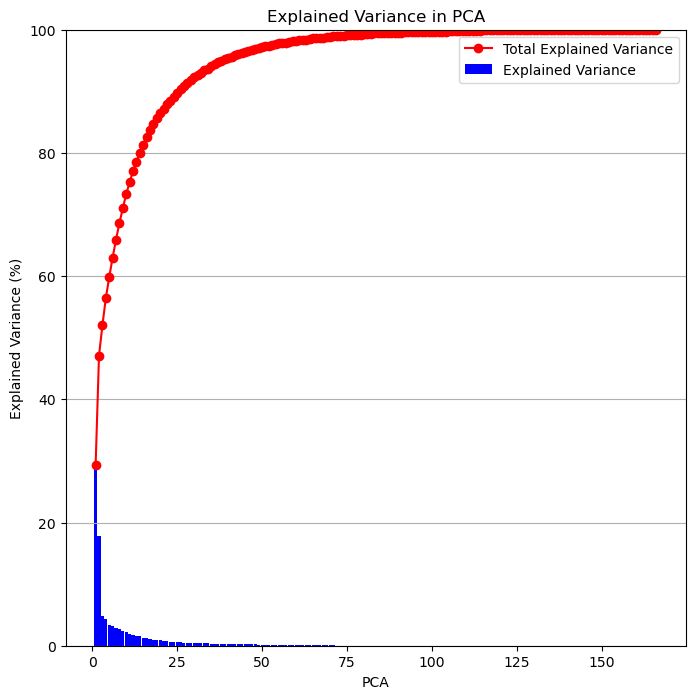

In [47]:
# Plotting our explained variance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x=df_expl_var.index, height=df_expl_var['Explained Variance (%)'], label='Explained Variance', width=0.9, color='blue')
ax.plot(df_expl_var['Total Explained Variance (%)'], label='Total Explained Variance', marker='o', c='red')

plt.ylim(0, 100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('PCA')
plt.grid(True, axis='y')
plt.title('Explained Variance in PCA')
plt.legend()

Based on the observations, it seems that PCA can effectively reduce the dimensionality of the data while preserving a significant portion of the variance. The first few PCs likely capture the most important patterns in the data, and retaining these PCs may be sufficient for further analysis or modeling.

- Specific Domain Knowledge: The interpretation of the PCs and their importance may depend on the specific domain and the nature of the data. Expertise in the field can help in understanding the patterns captured by the PCs.
- Dimensionality Reduction Goal: The number of PCs to retain depends on the specific goal of dimensionality reduction. If the goal is to capture as much variance as possible while minimizing dimensionality, the elbow point can be a guide. However, if the goal is to focus on the most important patterns, fewer PCs may be sufficient.
- Model Performance: Ultimately, the choice of PCs should be guided by the performance of the resulting reduced-dimensional data in subsequent analysis or modeling tasks.

First, I'll try using PCA to reduce the data to one dimension

In [48]:
# Fitting and Transforming Our Data Using PCA
pca1 = PCA(1)
X_pca1 = pca1.fit_transform(X_std)

In [49]:
print(X_pca1.shape)

(6581, 1)


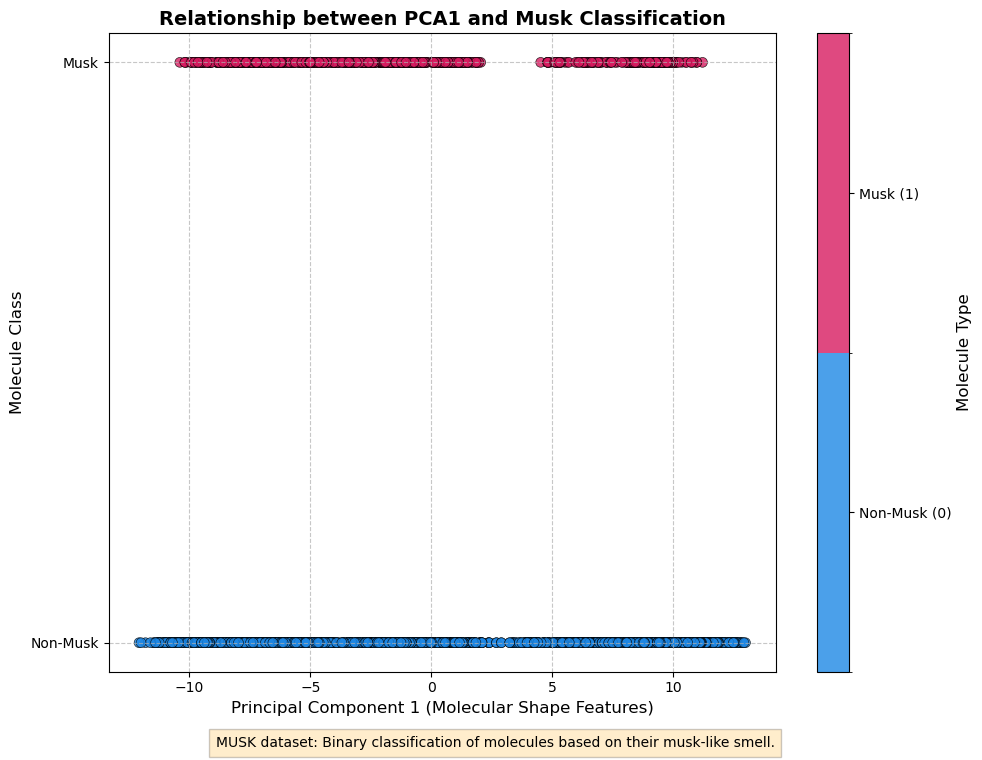

In [50]:
import matplotlib.colors as mcolors

# Extract the values from the DataFrame
y_values = y.values.flatten() 

cmap = mcolors.ListedColormap(['#1E88E5', '#D81B60'])  # Blue for non-musk, Pink for musk
bounds = [-0.5, 0.5, 1.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Scatter plot with coloring based on target values
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca1, y_values, c=y_values, cmap=cmap, norm=norm, 
                     alpha=0.8, s=50, edgecolors='k', linewidths=0.5)

# Add labels and title
plt.xlabel('Principal Component 1 (Molecular Shape Features)', fontsize=12)
plt.ylabel('Molecule Class', fontsize=12)
plt.title('Relationship between PCA1 and Musk Classification', fontsize=14, fontweight='bold')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Colorbar with discrete ticks
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label('Molecule Type', fontsize=12)
cbar.ax.set_yticklabels(['Non-Musk (0)', 'Musk (1)'])

plt.yticks([0, 1], ['Non-Musk', 'Musk'])

# Add annotation explaining the dataset
plt.figtext(0.5, 0.01, 
           "MUSK dataset: Binary classification of molecules based on their musk-like smell.",
           ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

In [51]:
explained_variance_ratio1 = pca1.explained_variance_ratio_[0]
print("Explained Variance Ratio (PC1):", explained_variance_ratio1)

Explained Variance Ratio (PC1): 0.2930937935181399


In [52]:
pca1.components_

array([[ 0.00234917,  0.07864372,  0.11634255, -0.09104837, -0.00451574,
         0.04208233, -0.12910606,  0.03585711, -0.12498551,  0.09653931,
        -0.01020756, -0.03431356,  0.02406085,  0.02352759,  0.01251468,
         0.0059009 , -0.1183603 ,  0.01026607, -0.01581994,  0.04406957,
        -0.10339937, -0.13109262, -0.12656283,  0.0943069 ,  0.11927423,
        -0.11690679, -0.08457524, -0.07359821, -0.05324806,  0.11637951,
         0.00108501,  0.01225876, -0.08747841,  0.10081088, -0.10919582,
         0.0168652 , -0.0310409 , -0.08480612,  0.11681175, -0.07989013,
         0.11402221,  0.01314861,  0.06091942,  0.00443925,  0.00972626,
        -0.00852787, -0.02682252, -0.09935282,  0.02570861,  0.08821339,
        -0.06714607, -0.1300452 , -0.13000388, -0.00889241,  0.07009469,
        -0.07238184, -0.12367103,  0.03282356, -0.01721278,  0.11060005,
        -0.08796386,  0.04279779, -0.01591156,  0.11166992, -0.09496299,
         0.00839177,  0.00660911,  0.03895243,  0.0

In [53]:
pca2 = PCA(2)
X_pca2 = pca2.fit_transform(X_std)

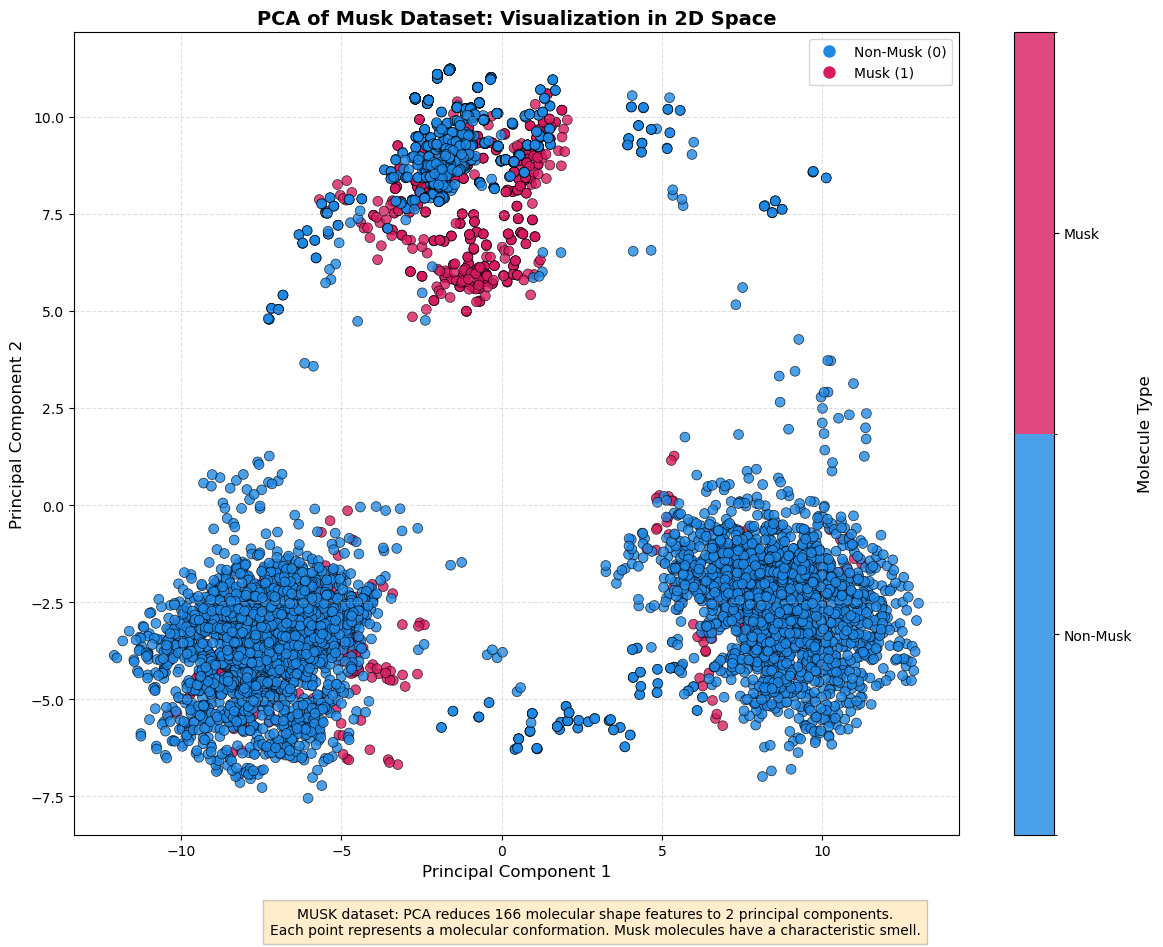

In [54]:
# Extract the values from the DataFrame
y_values = y.values.flatten()  # This converts the DataFrame to a 1D array

import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['#1E88E5', '#D81B60'])  # Blue for non-musk, Pink for musk
bounds = [-0.5, 0.5, 1.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Scatter plot with coloring based on target values
plt.figure(figsize=(12, 10))

scatter = plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y_values, cmap=cmap, norm=norm, 
                     alpha=0.8, s=50, edgecolors='k', linewidths=0.5)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA of Musk Dataset: Visualization in 2D Space', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.4)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1E88E5', 
              markersize=10, label='Non-Musk (0)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#D81B60', 
              markersize=10, label='Musk (1)')
]
plt.legend(handles=legend_elements, loc='best', fontsize=10)

# Colorbar with discrete ticks
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label('Molecule Type', fontsize=12)
cbar.ax.set_yticklabels(['Non-Musk', 'Musk'])

plt.figtext(0.5, 0.01, 
          "MUSK dataset: PCA reduces 166 molecular shape features to 2 principal components.\n"
          "Each point represents a molecular conformation. Musk molecules have a characteristic smell.",
          ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

# Show the plot
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
plt.show()

In [55]:
explained_variance = pca2.explained_variance_ratio_
print(f"Explained variance: PC1 = {explained_variance[0]:.2%}, PC2 = {explained_variance[1]:.2%}\n")
print(f"Total: {sum(explained_variance):.2%} of original variance")

Explained variance: PC1 = 29.31%, PC2 = 17.78%

Total: 47.09% of original variance


In [56]:
pca1.components_

array([[ 0.00234917,  0.07864372,  0.11634255, -0.09104837, -0.00451574,
         0.04208233, -0.12910606,  0.03585711, -0.12498551,  0.09653931,
        -0.01020756, -0.03431356,  0.02406085,  0.02352759,  0.01251468,
         0.0059009 , -0.1183603 ,  0.01026607, -0.01581994,  0.04406957,
        -0.10339937, -0.13109262, -0.12656283,  0.0943069 ,  0.11927423,
        -0.11690679, -0.08457524, -0.07359821, -0.05324806,  0.11637951,
         0.00108501,  0.01225876, -0.08747841,  0.10081088, -0.10919582,
         0.0168652 , -0.0310409 , -0.08480612,  0.11681175, -0.07989013,
         0.11402221,  0.01314861,  0.06091942,  0.00443925,  0.00972626,
        -0.00852787, -0.02682252, -0.09935282,  0.02570861,  0.08821339,
        -0.06714607, -0.1300452 , -0.13000388, -0.00889241,  0.07009469,
        -0.07238184, -0.12367103,  0.03282356, -0.01721278,  0.11060005,
        -0.08796386,  0.04279779, -0.01591156,  0.11166992, -0.09496299,
         0.00839177,  0.00660911,  0.03895243,  0.0

In [57]:
pca3 = PCA(3)
X_pca3 = pca3.fit_transform(X_std)

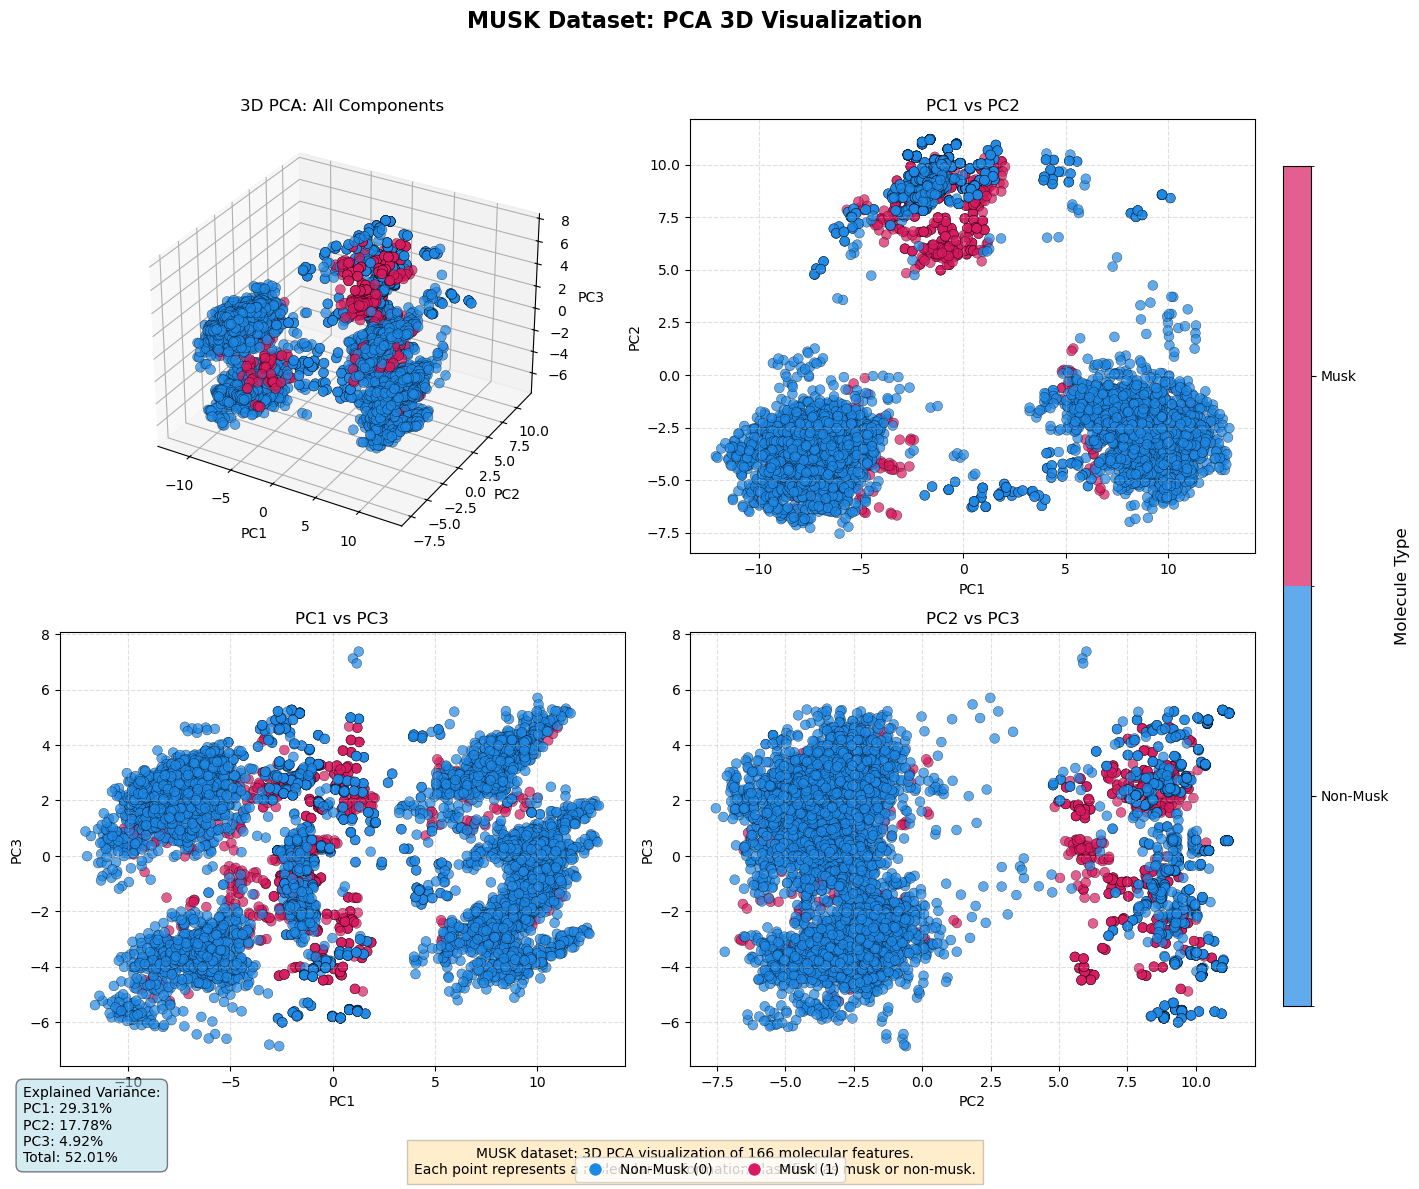

In [58]:
# Extract the values from the DataFrame
y_values = y.values.flatten()  # This converts the DataFrame to a 1D array

# Create a custom discrete colormap with just 2 colors for musk/non-musk
import matplotlib.colors as mcolors
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create color map
cmap = mcolors.ListedColormap(['#1E88E5', '#D81B60'])  # Blue for non-musk, Pink for musk
bounds = [-0.5, 0.5, 1.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create a figure with 3D axes
fig = plt.figure(figsize=(14, 12))

# Create 2x2 grid of plots to show different perspectives
# Main 3D plot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
scatter1 = ax1.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], 
                     c=y_values, cmap=cmap, norm=norm, s=50, alpha=0.7,
                     edgecolors='k', linewidths=0.3)

ax1.set_xlabel('PC1', fontsize=10)
ax1.set_ylabel('PC2', fontsize=10)
ax1.set_zlabel('PC3', fontsize=10)
ax1.set_title('3D PCA: All Components', fontsize=12)

# PC1 vs PC2
ax2 = fig.add_subplot(2, 2, 2)
scatter2 = ax2.scatter(X_pca3[:, 0], X_pca3[:, 1], 
                      c=y_values, cmap=cmap, norm=norm, s=50, alpha=0.7,
                      edgecolors='k', linewidths=0.3)
ax2.set_xlabel('PC1', fontsize=10)
ax2.set_ylabel('PC2', fontsize=10)
ax2.set_title('PC1 vs PC2', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.4)

# PC1 vs PC3
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(X_pca3[:, 0], X_pca3[:, 2], 
           c=y_values, cmap=cmap, norm=norm, s=50, alpha=0.7,
           edgecolors='k', linewidths=0.3)
ax3.set_xlabel('PC1', fontsize=10)
ax3.set_ylabel('PC3', fontsize=10)
ax3.set_title('PC1 vs PC3', fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.4)

# PC2 vs PC3
ax4 = fig.add_subplot(2, 2, 4)
ax4.scatter(X_pca3[:, 1], X_pca3[:, 2], 
           c=y_values, cmap=cmap, norm=norm, s=50, alpha=0.7,
           edgecolors='k', linewidths=0.3)
ax4.set_xlabel('PC2', fontsize=10)
ax4.set_ylabel('PC3', fontsize=10)
ax4.set_title('PC2 vs PC3', fontsize=12)
ax4.grid(True, linestyle='--', alpha=0.4)

# Add a shared colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position the colorbar
cbar = fig.colorbar(scatter1, cax=cbar_ax, ticks=[0, 1])
cbar.set_label('Molecule Type', fontsize=12)
cbar.ax.set_yticklabels(['Non-Musk', 'Musk'])

# Add a legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1E88E5', 
              markersize=10, label='Non-Musk (0)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#D81B60', 
              markersize=10, label='Musk (1)')
]
fig.legend(handles=legend_elements, loc='lower center', fontsize=10, ncol=2)

# Add information about explained variance
explained_variance = pca3.explained_variance_ratio_
total_variance = sum(explained_variance)

variance_text = (f"Explained Variance:\n"
                f"PC1: {explained_variance[0]:.2%}\n"
                f"PC2: {explained_variance[1]:.2%}\n"
                f"PC3: {explained_variance[2]:.2%}\n"
                f"Total: {total_variance:.2%}")

fig.text(0.02, 0.02, variance_text, fontsize=10, 
         bbox=dict(facecolor='lightblue', alpha=0.5, boxstyle='round,pad=0.5'))

# Add title for the entire figure
fig.suptitle('MUSK Dataset: PCA 3D Visualization', fontsize=16, fontweight='bold', y=0.98)

# Add annotation explaining the dataset
fig.text(0.5, 0.01, 
        "MUSK dataset: 3D PCA visualization of 166 molecular features.\n"
        "Each point represents a molecular conformation classified as musk or non-musk.",
        ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout(rect=[0, 0.05, 0.9, 0.95])
plt.subplots_adjust(bottom=0.1, right=0.9)
plt.show()